# Clustering networks

In [88]:
import warnings
warnings.filterwarnings('ignore')
from matplotlib.axes._axes import _log
_log.setLevel('ERROR')

import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from collections import Counter
from hdbscan import HDBSCAN
from matplotlib.cm import get_cmap
from sklearn.manifold import spectral_embedding
from sklearn.utils import check_array
from umap import UMAP

%matplotlib inline

seed = 42
random_state = np.random.RandomState(seed)

Defining the network:

In [89]:
# G = nx.erdos_renyi_graph(50, .08, seed=seed)
G = nx.read_edgelist("air_traffic.edgelist")
# G = nx.read_edgelist("academic_collaboration.edgelist")

Reducing dimensions with Spectral Embedding and UMAP and clustering with HDBSCAN:

clusters: 13
noise: 0.232


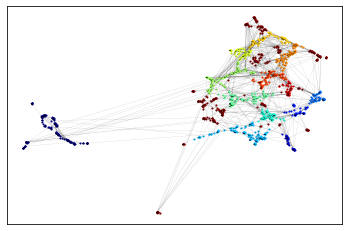

In [90]:
adj_matrix = nx.to_numpy_matrix(G)
node_list = list(G.nodes()) 

adj_matrix = check_array(adj_matrix, accept_sparse=['csr', 'csc', 'coo'], dtype=np.float64, ensure_min_samples=2)
embedding = spectral_embedding(adj_matrix, n_components=50, random_state=random_state, drop_first=False)
embedding = UMAP(n_components=2, random_state=random_state).fit_transform(embedding)

clusters = HDBSCAN(
    min_samples=1,
    min_cluster_size=40
).fit_predict(embedding)

print(f"clusters: {np.amax(clusters) + 1}")
print(f"noise: {np.round(Counter(clusters)[-1] / len(clusters), 3)}")

cmap = get_cmap('jet')(np.linspace(0, 1.0, np.amax(clusters) + 2))
pos = {node_list[i]: embedding[i] for i in range(len(node_list))}

for i in range(len(node_list)):
    nx.draw_networkx_nodes(G, pos=pos, nodelist={node_list[i]}, node_size=1, node_color=cmap[clusters[i]])
nx.draw_networkx_edges(G, pos=pos, width=.05)
nx.draw_networkx_labels(G, pos=pos, font_size=1)
plt.savefig("graph.pdf")
plt.show()

Removing nodes labeled as noise by HDBSCAN:

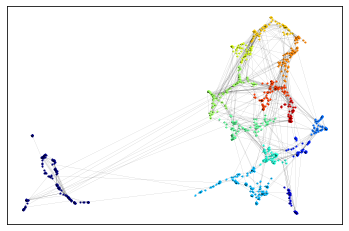

In [91]:
G.remove_nodes_from([node_list[i] for i in range(len(node_list)) if clusters[i] == -1])
node_list = list(G.nodes())
clusters = [clusters[i] for i in range(len(clusters)) if clusters[i] != -1]

for i in range(len(node_list)):
    nx.draw_networkx_nodes(G, pos=pos, nodelist={node_list[i]}, node_size=1, node_color=cmap[clusters[i]])
nx.draw_networkx_edges(G, pos=pos, width=.05)
nx.draw_networkx_labels(G, pos=pos, font_size=1)
plt.savefig("graph2.pdf")